In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
davis = pd.read_csv('davis.csv')
display(davis)
outside = pd.read_csv('outside.csv')
display(outside)

,Time,Temp (C),Gas (Ohm),Humidity (%),PM 1.0: %d,PM 2.5: %d,PM 10: %d
0,1.740615e+09,34.902852,5329,100.000000,0,0,0
1,1.740615e+09,24.339375,1585,38.773532,0,1,1
2,1.740615e+09,24.397773,3133,38.680099,0,1,1
3,1.740615e+09,24.461250,4649,38.446903,0,1,1
4,1.740615e+09,24.521602,6159,38.126164,0,1,1
...,...,...,...,...,...,...,...
295,1.740616e+09,25.118477,129444,31.641611,0,0,0
296,1.740616e+09,25.122578,129744,31.647569,0,0,0
297,1.740616e+09,25.124336,129544,31.630944,0,0,0
298,1.740616e+09,25.124336,130452,31.625351,0,0,0


,Time,Temp (C),Gas (Ohm),Humidity (%),PM 1.0: %d,PM 2.5: %d,PM 10: %d,Particles > 0.3um / 0.1L air,Particles > 0.5um / 0.1L air,Particles > 1.0um / 0.1L air,Particles > 2.5um / 0.1L air,Particles > 5.0um / 0.1L air,Particles > 10um / 0.1L air
0,1.740007e+09,34.018672,14852,100.000000,0,0,0,153,43,6,0,0,0
1,1.740007e+09,23.447383,7991,52.259518,0,0,0,153,43,6,0,0,0
2,1.740007e+09,23.488398,12949,52.167758,0,0,0,147,45,5,0,0,0
3,1.740007e+09,23.536055,16894,52.064773,0,0,0,147,45,5,0,0,0
4,1.740007e+09,23.582148,19901,51.949504,0,0,0,147,45,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.740007e+09,15.663984,114060,69.147235,1,1,1,258,74,8,1,0,0
296,1.740007e+09,15.655781,114449,69.264051,1,1,1,282,85,7,1,0,0
297,1.740007e+09,15.649727,114449,69.473159,1,1,1,282,85,7,1,0,0
298,1.740007e+09,15.643477,114527,69.511621,1,1,1,282,85,7,1,0,0


In [ ]:
# print("Inside CSV Columns:", outside.columns.tolist())
# print("Outside CSV Columns:", outside_data2.columns.tolist())

Inside CSV Columns: ['Time', 'PM 1.0: %d', 'PM 2.5: %d', 'PM 10: %d', 'Temp (C)', 'Gas (Ohm)', 'Humidity (%)', 'pressure', 'altitude']
Outside CSV Columns: ['Time', 'PM 1.0: %d', 'PM 2.5: %d', 'PM 10: %d', 'Temp (C)', 'Gas (Ohm)', 'Humidity (%)', 'pressure', 'altitude']


In [4]:
columns_to_drop = [
    "Particles > 2.5um / 0.1L air",
    "Particles > 5.0um / 0.1L air",
    "Particles > 10um / 0.1L air",
    'Particles > 0.3um / 0.1L air', 
    'Particles > 0.5um / 0.1L air', 
    'Particles > 1.0um / 0.1L air'
]

outside = outside.drop(columns=[col for col in columns_to_drop if col in outside.columns])


In [5]:
columns_to_drop = [
    "pressure",
    "altitude"
]
davis = davis.drop(columns=[col for col in columns_to_drop if col in davis.columns])


In [7]:
def timenormalize(dataframe1):
    # subtracts first value of first column in data frame against all other values in first column
    # intention is to make time readable by removing epoch time difference
    dataframe1.iloc[:,0]-=dataframe1.iloc[0,0]
    # print(f"This is dataframetest: {dataframe1}")

timenormalize(davis)
timenormalize(outside)


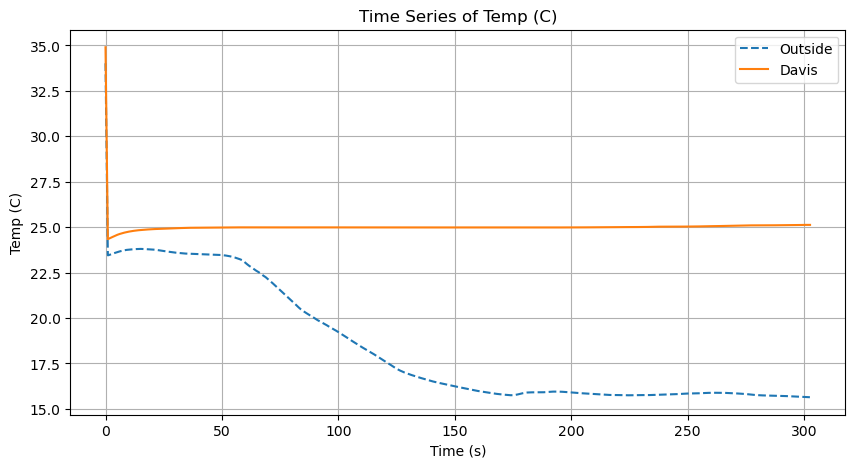

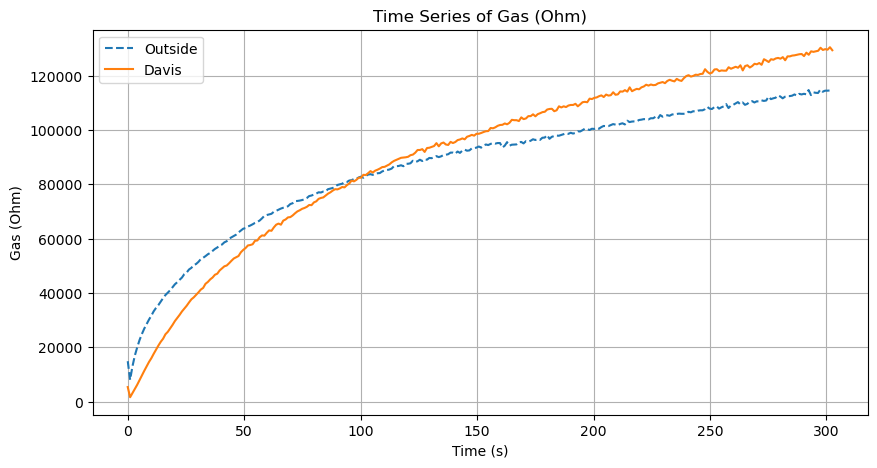

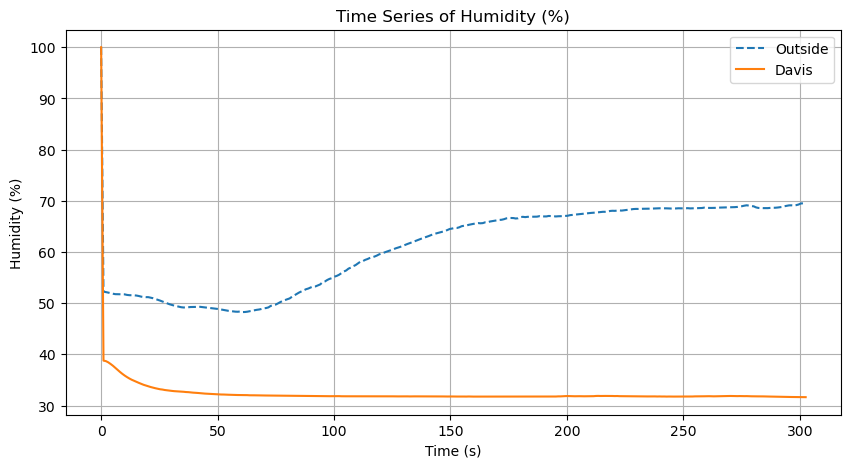

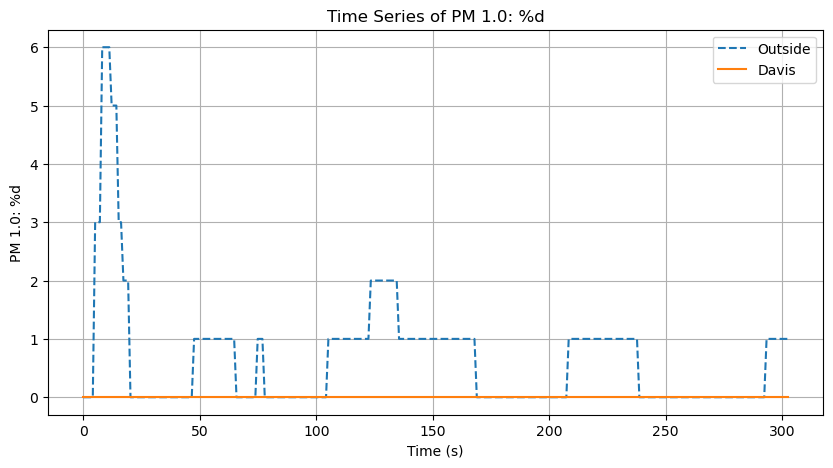

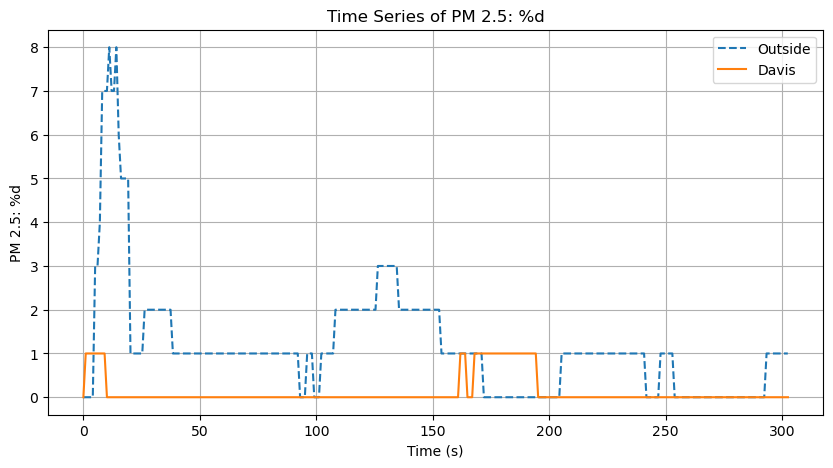

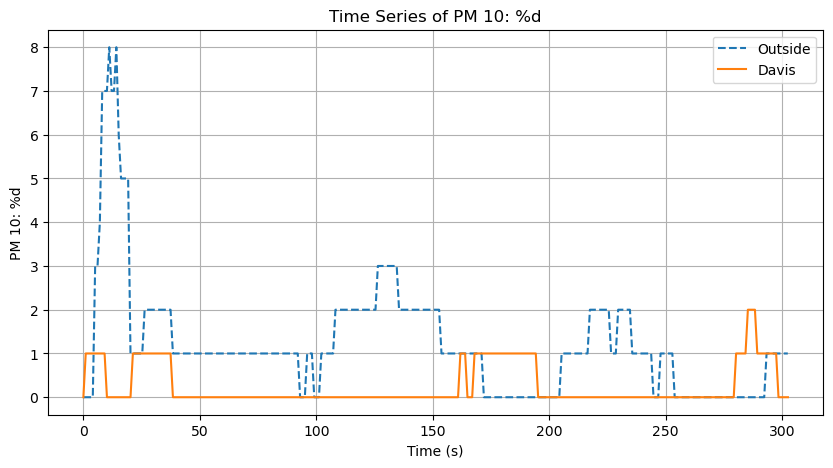

In [8]:
# Plot time series for each variable
variables = ["Temp (C)", "Gas (Ohm)", "Humidity (%)", 'PM 1.0: %d',
             'PM 2.5: %d','PM 10: %d']

for var in variables:
    plt.figure(figsize=(10, 5))
    plt.plot(outside["Time"], outside[var], label="Outside", linestyle="dashed")
    plt.plot(davis["Time"], davis[var], label="Davis")
    plt.xlabel("Time (s)")
    plt.ylabel(var)
    plt.title(f"Time Series of {var}")
    plt.legend()
    plt.grid()
    plt.show()

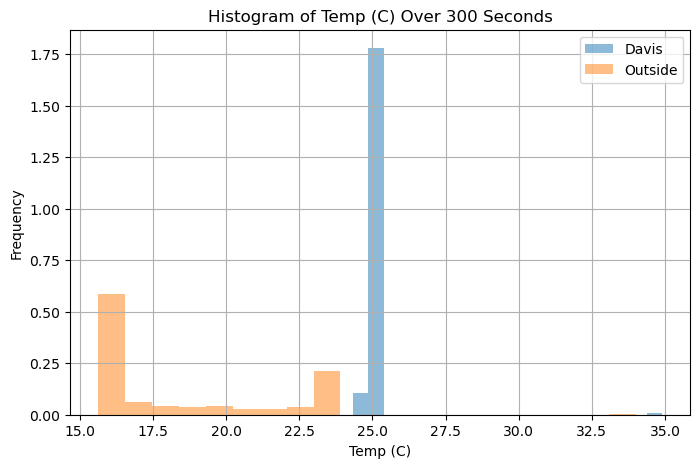

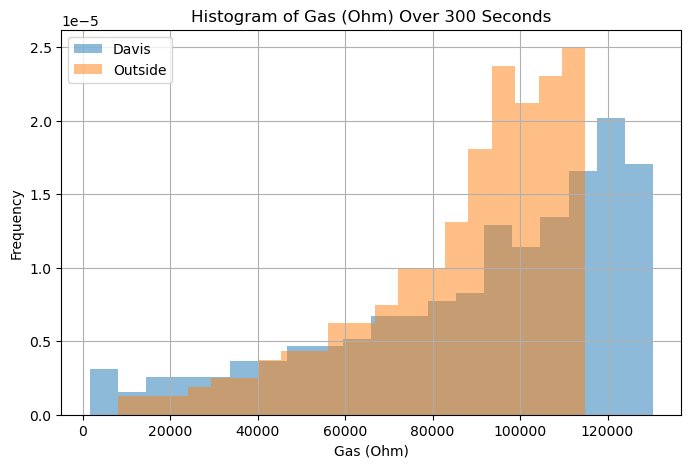

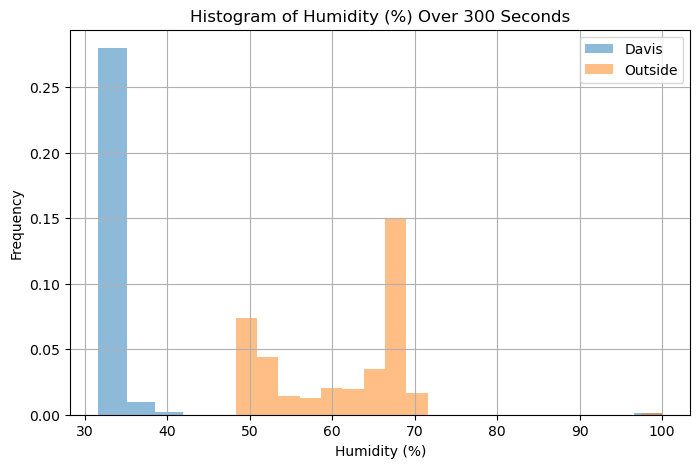

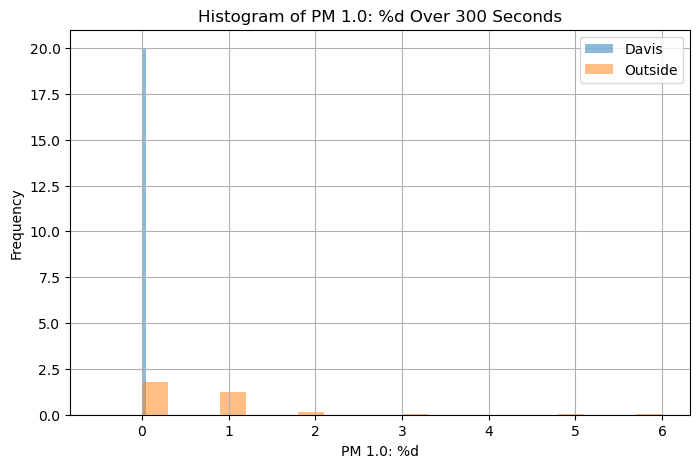

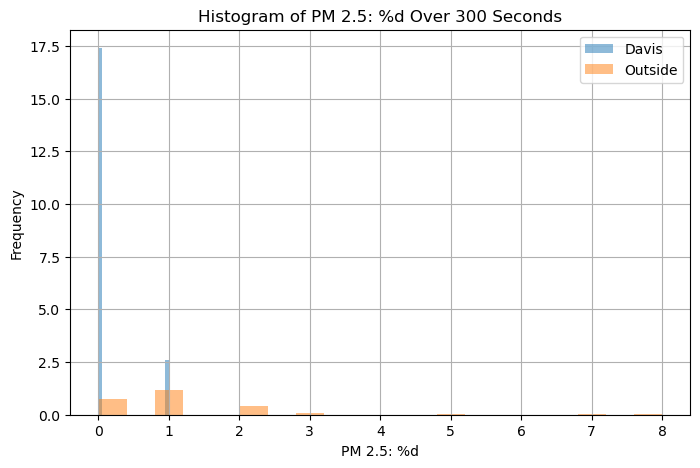

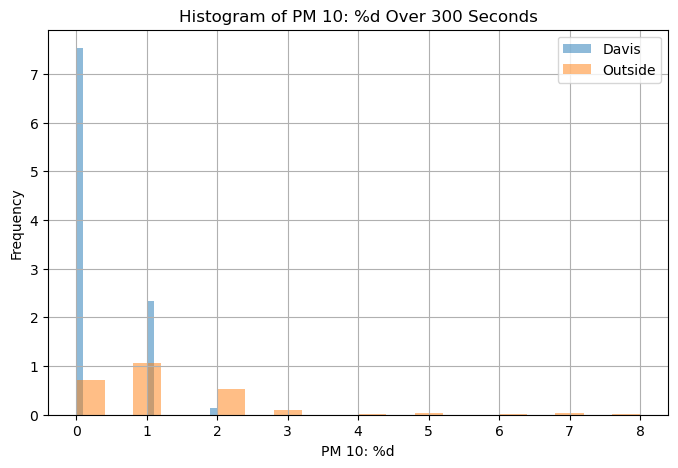

In [11]:
# histograms
for var in variables:
    plt.figure(figsize=(8, 5))
    plt.hist(davis[var], bins=20, alpha=0.5, label="Davis", density=True)
    plt.hist(outside[var], bins=20, alpha=0.5, label="Outside", density=True)
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {var} Over 300 Seconds")
    plt.legend()
    plt.grid()
    plt.show()

In [12]:
# Comparison
for var in variables:
    mean_1 = np.mean(davis[var])
    mean_2 = np.mean(outside[var])
    std_1 = np.std(davis[var], ddof=1)
    std_2 = np.std(outside[var], ddof=1)
    
    N_1 = len(davis[var])
    N_2 = len(outside[var])
    
    sigma_mean_1 = std_1 / np.sqrt(N_1)
    sigma_mean_2 = std_2 / np.sqrt(N_2)
    
    diff = abs(mean_1 - mean_2)
    threshold = 3 * np.sqrt(sigma_mean_1**2 + sigma_mean_2**2)
    
    print(f"{var}:")
    print(f"  Davis ± σ_mean: {mean_1:.2f} ± {sigma_mean_1:.2f}")
    print(f"  Outside Mean ± σ_mean: {mean_2:.2f} ± {sigma_mean_2:.2f}")
    print(f"  Difference = {diff:.2f}, Threshold = {threshold:.2f}")
    
    if diff > threshold:
        print("Statistically different (3𝜎 separated)")
    else:
        print("Not statistically different")
    print("-" * 50)


Temp (C):
  Davis ± σ_mean: 25.02 ± 0.03
  Outside Mean ± σ_mean: 18.36 ± 0.19
  Difference = 6.66, Threshold = 0.58
Statistically different (3𝜎 separated)
--------------------------------------------------
Gas (Ohm):
  Davis ± σ_mean: 90499.09 ± 1880.28
  Outside Mean ± σ_mean: 86621.95 ± 1354.87
  Difference = 3877.14, Threshold = 6952.72
Not statistically different
--------------------------------------------------
Humidity (%):
  Davis ± σ_mean: 32.41 ± 0.24
  Outside Mean ± σ_mean: 60.96 ± 0.47
  Difference = 28.55, Threshold = 1.58
Statistically different (3𝜎 separated)
--------------------------------------------------
PM 1.0: %d:
  Davis ± σ_mean: 0.00 ± 0.00
  Outside Mean ± σ_mean: 0.65 ± 0.06
  Difference = 0.65, Threshold = 0.18
Statistically different (3𝜎 separated)
--------------------------------------------------
PM 2.5: %d:
  Davis ± σ_mean: 0.13 ± 0.02
  Outside Mean ± σ_mean: 1.16 ± 0.08
  Difference = 1.03, Threshold = 0.24
Statistically different (3𝜎 separated)
---